Interactive plot

In [1]:
import torch

from examples.dataloader_16_ag import DataLoader
from src.model import r0, epidemic_model

In [2]:
data = DataLoader()
r0gen = r0.R0Generator(data)
model = epidemic_model.EpidemicModel(data)

susc = torch.ones(data.n_age).to(data.device)
data.model_params.update({"susc": susc})

In [3]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [4]:
def create_interactive_plot():
    t_eval = torch.linspace(1, 1200, 1200).to(data.device)
    susceptibles = model.get_initial_values()[model.idx("s_0")]

    def update(r0, alpha):
        beta = r0 / r0gen.get_eig_val(contact_mtx=data.cm,
                                      susceptibles=susceptibles.reshape(1, -1),
                                      population=data.age_data.flatten())
        data.model_params["beta"] = beta
        data.model_params["alpha"] = alpha
        model.initialize_constant_matrices()

        sol = model.get_solution(y0=model.get_initial_values()[None, :], t_eval=t_eval[None, :]).ys[0, :, :]
        mask = torch.cat((torch.full((100,), True),
                          sol[100:, model.idx('i_0')].sum(axis=1) > 1))
        sol = sol[mask, :]
        t = t_eval[mask]
        for idx, comp in enumerate(["ic", "d"]):
            comp_sol = model.aggregate_by_age(sol, comp)
            plt.plot(t, comp_sol, label=comp.upper(), linewidth=2)
        plt.legend()
        plt.xlabel = "Napok"
        plt.ylabel = "Egyedszám"
        plt.show()
    r0_slider = widgets.FloatSlider(value=2,
                               min=1 ,
                               max=10,
                               step=0.1,
                               description="R0:")
    alpha_slider = widgets.FloatSlider(value=0.5,
                                     min=0.05,
                                     max=1,
                                     step=0.05,
                                     description="Alpha: ")
    # Hozzáadás az ábrához
    widgets.interact(update, r0=r0_slider, alpha=alpha_slider)

In [5]:
create_interactive_plot()

interactive(children=(FloatSlider(value=2.0, description='R0:', max=10.0, min=1.0), FloatSlider(value=0.5, des…

Sensitivity analysis

In [6]:
from examples.vaccinated_sensitivity.simulation_vacc import SimulationVaccinated

In [7]:
def run_vacc_sim():
    data = DataLoader()
    simulation = SimulationVaccinated(data=data)
    simulation.run_sampling()
    simulation.calculate_prcc_for_simulations()
    simulation.calculate_all_p_values()
    simulation.plot_prcc_tornado_with_p_values()
    simulation.plot_optimal_vaccine_distributions()


 Batches solved, time limit: 500, samples left: 500:   0%|          | 0/5 [00:00<?, ?it/s]


 Simulation for 500 samples (1.0-1.8-d_max)
Batch size: 100




 Batches solved, time limit: 500, samples left: 500:  20%|██        | 1/5 [00:01<00:04,  1.07s/it]
 Batches solved, time limit: 500, samples left: 500:  40%|████      | 2/5 [00:02<00:03,  1.08s/it]
 Batches solved, time limit: 500, samples left: 500:  60%|██████    | 3/5 [00:03<00:02,  1.09s/it]
 Batches solved, time limit: 500, samples left: 500:  80%|████████  | 4/5 [00:04<00:01,  1.09s/it]
                                                                                                   
 Batches solved, time limit: 550, samples left: 360:   0%|          | 0/4 [00:00<?, ?it/s]
 Batches solved, time limit: 550, samples left: 360:  25%|██▌       | 1/4 [00:00<00:00,  9.80it/s]
 Batches solved, time limit: 550, samples left: 360:  50%|█████     | 2/4 [00:00<00:00,  9.66it/s]
                                                                                                   
 Batches solved, time limit: 600, samples left: 232:   0%|          | 0/3 [00:00<?, ?it/s]
                       


 Elapsed time:  6.551900386810303

Insignificant p-values in  1.0-1.8-d_max  case: 

	 2. p-val:  0.2381275422536271
	 4. p-val:  0.5498412273752282


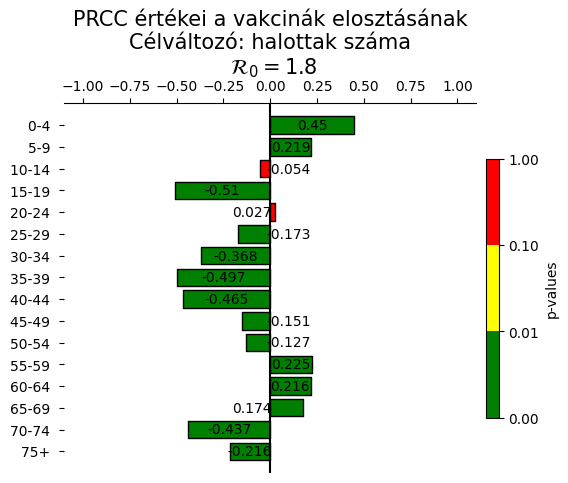

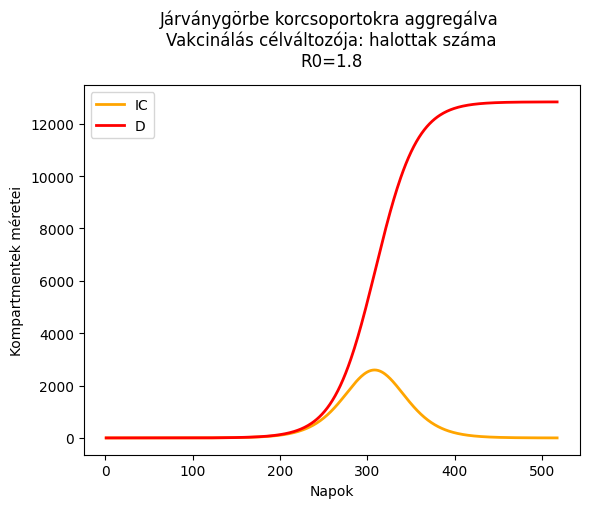

In [8]:
run_vacc_sim()